In [1]:
import pandas as pd
from source import image_id_converter as img_idc
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib as pl
from pathlib import Path
import os

In [2]:
import ollama
import json
import re

In [3]:

project_path = Path.cwd()
#root_path = (project_path / '..').resolve()

# Define paths
#image_dir = root_path/'visual_genome_proc_data'  # Replace with your directory containing images
image_dir = project_path/'visual_genome_proc_data'  # Replace with your directory containing images

#image_dir_2 = root_path/'data_1'
image_dir_2 = project_path/'data_1'

In [4]:
project_path

PosixPath('/storage/homefs/sh98e089')

In [5]:
image_dir_2

PosixPath('/storage/homefs/sh98e089/data_1')

### minicpm-v for image analysis first try:

In [6]:


# For batch processing your images
def analyze_image(image_path, prompt):
    response = ollama.chat(
        #model="minicpm-v",  # or "llava"
        #model="llama3.2-v",
        model="llama3.2-vision:90b",
        messages=[{
            'role': 'user', 
            'content': prompt,
            'images': [image_path]
        }]
    
    )
    return response['message']['content']

# Your specific use case
prompt = "List the 5 most prominent objects in this image and categorize the image type (photography, map, painting, etc.)"



In [7]:
image_files = os.listdir(image_dir)

In [8]:
image_files[0]

'visual_genome_proc_29.jpg'

In [43]:
image_file_path = image_dir / image_files[3]
#image_file_path = image_dir / 'visual_genome_proc_29.jpg'
image_file_path

PosixPath('/storage/homefs/sh98e089/visual_genome_proc_data/visual_genome_proc_49.jpg')

In [44]:
analyze_image(image_file_path, prompt)

'The image depicts a city street scene, with the following five most prominent objects:\n\n1. Buildings: The image features several tall buildings lining the street, showcasing a mix of modern and older architectural styles.\n2. Cars: A few cars are parked along the side of the road or driving down the street, adding to the urban atmosphere.\n3. People: Several individuals can be seen walking on the sidewalk or crossing the street, going about their daily business.\n4. Streetlights: Tall streetlights stand at regular intervals along the street, providing illumination for pedestrians and drivers.\n5. Trees: A few trees are scattered throughout the scene, adding some greenery to the otherwise concrete-dominated environment.\n\nAs for the image type, it appears to be a photograph taken from a low angle, looking up at the buildings and capturing the hustle and bustle of city life.'

In [45]:
image_file_path

PosixPath('/storage/homefs/sh98e089/visual_genome_proc_data/visual_genome_proc_49.jpg')

In [46]:
image = Image.open('/storage/homefs/sh98e089/visual_genome_proc_data/visual_genome_proc_29.jpg')

In [47]:
image = Image.open(image_file_path)

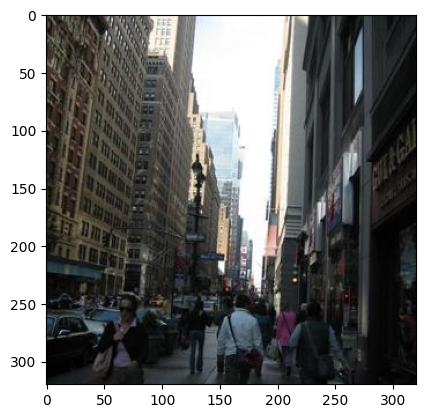

In [48]:
plt.imshow(image)

### Trying to get structured answers:

In [14]:
def create_analysis_prompt():
    """Create the structured prompt for image analysis."""
    return """
    Analyze this image and return ONLY a Python dictionary in exactly this format:
    
    {
        'image_type': [],  # List all that apply: photography, drawing, painting, statistics_figure, map, scheme
        'person': X,              # 1 if present, 0 if not
        'person_confidence': Y,   # Confidence 0-1 (1=certain, 0.5=completely uncertain)
        'mountain': X,            # 1 if present, 0 if not
        'mountain_confidence': Y, # Confidence 0-1
        'river': X,               # 1 if present, 0 if not
        'river_confidence': Y,    # Confidence 0-1
        'lake': X,                # 1 if present, 0 if not
        'lake_confidence': Y,     # Confidence 0-1
        'building': X,            # 1 if present, 0 if not
        'building_confidence': Y, # Confidence 0-1
        'church': X,              # 1 if present, 0 if not
        'church_confidence': Y,   # Confidence 0-1
        'city': X,                # 1 if present, 0 if not
        'city_confidence': Y,     # Confidence 0-1
        'village': X,             # 1 if present, 0 if not
        'village_confidence': Y,  # Confidence 0-1
        'glacier': X,             # 1 if present, 0 if not
        'glacier_confidence': Y,  # Confidence 0-1
        'other_objects': [],      # List of other noteworthy/dominant objects
        'additional_comments': '' # Any additional observations or empty string if none
    }
    
    Replace X with 1 (present) or 0 (not present).
    Replace Y with confidence score 0-1 (1.0=completely certain, 0.5=completely uncertain, 0.0=certain of absence).
    Return ONLY the dictionary, no other text.
    """

In [15]:
def create_analysis_prompt():
    """Create the structured prompt for image analysis."""
    return """
    Analyze this image and return ONLY a Python dictionary in exactly this format:
    
    {
        'image_type': [],  # List all that apply: photography, drawing, painting, statistics_figure, map, scheme
        'person': X,              # 1 if present, 0 if not
        'mountain': X,            # 1 if present, 0 if not
        'river': X,               # 1 if present, 0 if not
        'lake': X,                # 1 if present, 0 if not
        'building': X,            # 1 if present, 0 if not
        'church': X,              # 1 if present, 0 if not
        'city': X,                # 1 if present, 0 if not
        'village': X,             # 1 if present, 0 if not
        'glacier': X,             # 1 if present, 0 if not
        'other_objects': [],      # List of other noteworthy/dominant objects
        'additional_comments': '' # Any additional observations or empty string if none
    }
    
    Replace X with 1 (present) or 0 (not present).
    Return ONLY the dictionary, no other text.
    """

In [16]:
create_analysis_prompt()

"\n    Analyze this image and return ONLY a Python dictionary in exactly this format:\n\n    {\n        'image_type': [],  # List all that apply: photography, drawing, painting, statistics_figure, map, scheme\n        'person': X,              # 1 if present, 0 if not\n        'mountain': X,            # 1 if present, 0 if not\n        'river': X,               # 1 if present, 0 if not\n        'lake': X,                # 1 if present, 0 if not\n        'building': X,            # 1 if present, 0 if not\n        'church': X,              # 1 if present, 0 if not\n        'city': X,                # 1 if present, 0 if not\n        'village': X,             # 1 if present, 0 if not\n        'glacier': X,             # 1 if present, 0 if not\n        'other_objects': [],      # List of other noteworthy/dominant objects\n        'additional_comments': '' # Any additional observations or empty string if none\n    }\n\n    Replace X with 1 (present) or 0 (not present).\n    Return ONLY the d

In [17]:
def call_ollama_model(image_path, prompt):
    """Make the API call to Ollama."""
    response = ollama.chat(
        #model="minicpm-v",
        #model="llama3.2-v",
        model="llama3.2-vision:90b",
        messages=[{
            'role': 'user', 
            'content': prompt,
            'images': [image_path]
        }]
    )
    return response['message']['content']

In [18]:
def parse_response_to_dict(response_text):
    """Parse the model response into a Python dictionary."""
    try:
        dict_match = re.search(r'\{.*\}', response_text, re.DOTALL)
        if dict_match:
            dict_str = dict_match.group()
            dict_str = dict_str.replace('\\_', '_')
            result_dict = ast.literal_eval(dict_str)
            success = True
        else:
            result_dict = None
            success = False
    except Exception as e:
        result_dict = None
        success = False
    
    return success, result_dict


In [19]:
def analyze_image_structured(image_path):
    """Main function that orchestrates the image analysis."""
    prompt = create_analysis_prompt()
    response_text = call_ollama_model(image_path, prompt)
    success, result_dict = parse_response_to_dict(response_text)
    
    if success:
        return result_dict
    else:
        print(f"Failed to parse response for {image_path}")
        print(f"Raw response: {response_text}")
        return None

In [20]:
def analyze_image_structured(image_path):
    """Main function that orchestrates the image analysis."""
    prompt = create_analysis_prompt()
    response_text = call_ollama_model(image_path, prompt)
    success, result_dict = parse_response_to_dict(response_text)
    
    if success:
        return result_dict
    else:
        llm_response = {"raw_response": response_text}
        return llm_response

In [21]:
analyze_image_structured(image_file_path)

{'raw_response': "{\n    'image_type': ['photography'],\n    'person': 1,\n    'mountain': 0,\n    'river': 0,\n    'lake': 0,\n    'building': 0,\n    'church': 0,\n    'city': 0,\n    'village': 0,\n    'glacier': 0,\n    'other_objects': ['boat', 'dog'],\n    'additional_comments': 'The image features a serene beach scene with a woman and her dog near a boat, set against a backdrop of calm waters and a clear sky.'\n}"}

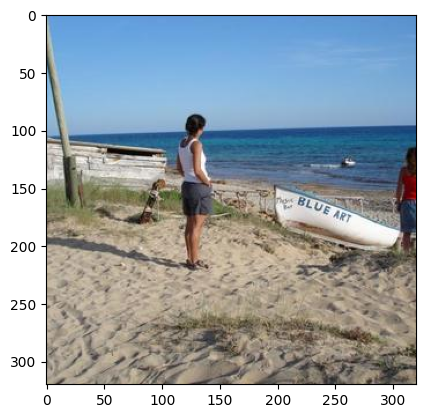

In [22]:
image = Image.open(image_file_path)
plt.imshow(image)
plt.show()

In [23]:
image_files = os.listdir(image_dir)

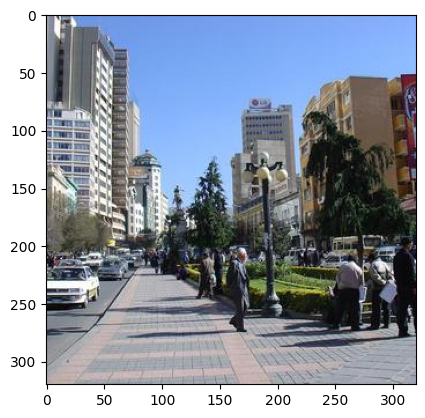

{'raw_response': "{\n    'image_type': ['photography'],\n    'person': 1,\n    'mountain': 0,\n    'river': 0,\n    'lake': 0,\n    'building': 1,\n    'church': 0,\n    'city': 1,\n    'village': 0,\n    'glacier': 0,\n    'other_objects': ['cars', 'trees', 'streetlights'],\n    'additional_comments': 'The image appears to be a daytime scene with a clear sky.'\n}"}


In [24]:
image_descr = []

for image_file in image_files[17:20]:
    image_path = image_dir / image_file

    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

    image_description = analyze_image_structured(image_path)
    print(image_description)
    image_descr.append(image_description)
    

In [25]:
prompt_2 = "Do you see a person in this picture? If so, answer by returning 1, if not return 0."


In [26]:
giub_images = os.listdir(image_dir_2)
giub_images[0:4]

['BernerOberland002.tif',
 'BernerOberland106.tif',
 'BernerOberland028.tif',
 'BernerOberland098.tif']

In [ ]:
from PIL import Image
import os
from pathlib import Path

def convert_image_if_needed(image_path):
    """Convert TIFF (and other unsupported formats) to JPG."""
    path = Path(image_path)
    
    if path.suffix.lower() in ['.tif', '.tiff']:
        try:
            img = Image.open(path)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Build new path manually
            jpg_path = path.parent / f"{path.stem}_converted.jpg"
            
            img.save(jpg_path, 'JPEG', quality=100)
            print(f"Converted {path} to {jpg_path}")
            return str(jpg_path)
        except Exception as e:
            print(f"Error converting {path}: {e}")
            return None
    else:
        return str(path)

def call_ollama_model(image_path, prompt):
    """Make the API call to Ollama."""
    # Convert image if needed
    processed_path = convert_image_if_needed(image_path)
    if processed_path is None:
        raise ValueError(f"Could not process image: {image_path}")
    
    response = ollama.chat(
        #model="minicpm-v",
        #model="llama3.2-v",
        model="llama3.2-vision:90b",
        messages=[{
            'role': 'user', 
            'content': prompt,
            'images': [processed_path]
        }],
        options={
        'temperature': 0.1,  # Lower = more deterministic (0.0 to 1.0)
        'seed': 42           # Fixed seed for reproducibility
    }
    )
    return response['message']['content']

In [ ]:
giub_images = os.listdir(image_dir_2)
giub_images[0:4]

image_descr = []

for image_file in giub_images[0:27]:
    image_path = image_dir_2 / image_file

    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

    image_description = call_ollama_model(image_path, prompt_2)
    print(image_description)

    

In [ ]:
import shutil
from pathlib import Path

def move_jpg_files(source_folder, destination_folder):
    """
    Move all JPG files from source folder to destination folder.
    TIF files remain in the source folder.
    
    Args:
        source_folder (str or Path): Path to source folder
        destination_folder (str or Path): Path to destination folder
    """
    source_path = Path(source_folder)
    dest_path = Path(destination_folder)
    
    # Create destination folder if it doesn't exist
    dest_path.mkdir(parents=True, exist_ok=True)
    
    # Find all JPG files (case insensitive)
    jpg_extensions = ['.jpg', '.jpeg']
    jpg_files = []
    
    for ext in jpg_extensions:
        jpg_files.extend(source_path.glob(f'*{ext}'))
        jpg_files.extend(source_path.glob(f'*{ext.upper()}'))
    
    # Move each JPG file
    moved_count = 0
    for jpg_file in jpg_files:
        try:
            destination_file = dest_path / jpg_file.name
            shutil.move(str(jpg_file), str(destination_file))
            print(f"Moved: {jpg_file.name}")
            moved_count += 1
        except Exception as e:
            print(f"Error moving {jpg_file.name}: {e}")
    
    print(f"\nTotal files moved: {moved_count}")
    
    # Show what's left in source folder
    remaining_files = list(source_path.glob('*'))
    remaining_files = [f for f in remaining_files if f.is_file()]
    print(f"Files remaining in source: {len(remaining_files)}")



In [ ]:
image_dir_2

In [ ]:
# Usage
source_folder = image_dir_2
#destination_folder = root_path/'data_jpg'
destination_folder = project_path/'data_jpg'

move_jpg_files(source_folder, destination_folder)

In [ ]:
#image_dir_3 = root_path/'data_jpg'
image_dir_3 = project_path/'data_jpg'
giub_images = os.listdir(image_dir_3)


image_descr = []

for image_file in giub_images:
    image_path = image_dir_3 / image_file

    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

    image_description = analyze_image_structured(image_path)
    print(image_description)
    image_descr.append(image_description)


In [ ]:
import ollama
import json
import re

def create_analysis_prompt():
    """Create the structured prompt for image analysis."""
    return """
    Analyze this image and return ONLY a Python dictionary in exactly this format:
    
    {
        'image_type': ['photography', 'map'],  # List all that apply: photography, drawing, painting, statistics_figure, map, scheme
        'person': 1,          # 1 if present, 0 if not
        'mountain': 0,        # 1 if present, 0 if not  
        'river': 1,           # 1 if present, 0 if not
        'lake': 0,            # 1 if present, 0 if not
        'building': 1,        # 1 if present, 0 if not
        'church': 0,          # 1 if present, 0 if not
        'city': 0,            # 1 if present, 0 if not
        'village': 1,         # 1 if present, 0 if not
        'glacier': 0,         # 1 if present, 0 if not
        'other_objects': ['bridge', 'forest']  # List of other noteworthy/dominant objects
    }
    
    Return ONLY the dictionary, no other text.
    """

def call_ollama_model(image_path, prompt):
    """Make the API call to Ollama."""
    response = ollama.chat(
        #model="minicpm-v", 
        #model="llama3.2-v",
        model="llama3.2-vision:90b",
        messages=[{
            'role': 'user', 
            'content': prompt,
            'images': [image_path]
        }]
    )
    return response['message']['content']

def parse_response_to_dict(response_text):
    """Parse the model response into a Python dictionary."""
    try:
        dict_match = re.search(r'\{.*\}', response_text, re.DOTALL)
        if dict_match:
            dict_str = dict_match.group()
            result_dict = eval(dict_str)  # Note: eval is risky, should use ast.literal_eval
            return result_dict
        else:
            raise ValueError(f"No dictionary found in response: {response_text}")
    except Exception as e:
        raise ValueError(f"Error parsing response: {e}")

def analyze_image_structured(image_path):
    """Main function that orchestrates the image analysis."""
    prompt = create_analysis_prompt()
    response_text = call_ollama_model(image_path, prompt)
    result_dict = parse_response_to_dict(response_text)
    return result_dict

In [ ]:
def create_analysis_prompt():
    """Create the structured prompt for image analysis."""
    return """
    Analyze this image and return ONLY a Python dictionary in exactly this format:
    
    {
        'image_type': ['photography', 'map'],  # List all that apply: photography, drawing, painting, statistics_figure, map, scheme
        'person': 1,          # 1 if present, 0 if not
        'mountain': 0,        # 1 if present, 0 if not  
        'river': 1,           # 1 if present, 0 if not
        'lake': 0,            # 1 if present, 0 if not
        'building': 1,        # 1 if present, 0 if not
        'church': 0,          # 1 if present, 0 if not
        'city': 0,            # 1 if present, 0 if not
        'village': 1,         # 1 if present, 0 if not
        'glacier': 0,         # 1 if present, 0 if not
        'other_objects': ['bridge', 'forest'],  # List of other noteworthy/dominant objects
        'additional_comments': 'The lighting suggests this was taken during golden hour'  # Any additional observations or empty string if none
    }
    
    Return ONLY the dictionary, no other text. If you have additional comments or observations, put them in the 'additional_comments' field.
    """

In [ ]:
#image_dir_3 = root_path/'data_jpg'
image_dir_3 = project_path/'data_jpg'
giub_images = os.listdir(image_dir_3)


image_descr = []

for image_file in giub_images:
    image_path = image_dir_3 / image_file

    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

    image_description = analyze_image_structured(image_path)
    print(image_description)
    image_descr.append(image_description)